**Exercise 3**

In [1]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand
import matplotlib.pyplot as plt
import random as rnd
import math

import scipy.interpolate as interp
def show_simulation(first_result,nodes):
    
    fig = plt.figure(1, figsize=(15,12))
    ax = plt.subplot()
    colors = ['g','b','m','y','r']
    
    for node in nodes:
        particles_node = first_result[:,nodes.index(node)]
        particles_node_interp = interp.interp1d(np.arange(particles_node.size),particles_node)
        particles_node_compress = particles_node_interp(np.linspace(0,particles_node.size-1,time_limit))
        ax.plot(particles_node_compress,"-ok",label = node,color = colors[nodes.index(node)])
    ax.set_ylabel("Number of particles")
    ax.set_xlabel("Time units")
    ax.set_title(f"Interpolation of number of particles for each node in {time_limit} time units - INPUT RATE: {source_rate}")
    ax.legend()
    
def round_vector(vector,decimal=3):
    for i in range(len(vector)):
        vector[i] = round(vector[i],decimal)
    return vector

## CONSTRUCTION OF GRAPH G ##
nodes = ["o", "a", "b", "c", "d"]
edges = [("o", "a"), ("o", "b"), ("a", "b"), ("a", "c"),("a","d"),("b", "c"),("c", "d")]

G = nx.DiGraph(directed = True)
G.add_nodes_from(nodes)
G.add_edges_from(edges)

## TRANSITION MATRIX ##
# defining the transition matrix
t_m = [
    [0, 2/3, 1/3, 0, 0],
    [0, 0, 1/4, 1/4, 2/4],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
]

w = np.sum(t_m, axis = 1)
P = np.array(t_m)

**Proportional rate**
(a - *first point*) Simulate the system for 60 time units and plot the evolution of the number of particles
in each node over time.

In [72]:
P_cum = np.cumsum(P, axis = 1)
source_pos = nodes.index("o")
source_rate = round(1,3)
dest_pos = nodes.index("d")
time_limit = 60

num_particles=0
w_star_subgraph = 1

previous_step=-1 #Index corresponding to the number of particles of each node for the previous step
n_nodes = len(nodes)
num_particles_for_node = np.zeros((1,n_nodes))

time = 0
while time < time_limit:
    
    global_tick = -np.log(np.random.rand())/(num_particles*w_star_subgraph) if num_particles > 0 else float('+inf')
    source_tick = -np.log(np.random.rand())/source_rate
    
    if source_tick < global_tick:
        time +=source_tick
        next_state = num_particles_for_node[previous_step]
        next_state[source_pos]+=1
        num_particles +=1
    else:
        if num_particles > 0:
            time+=global_tick
            current_state = num_particles_for_node[previous_step]
            normalized_numparticles_fornode = np.cumsum(current_state/num_particles)
            selected_node = np.argwhere(normalized_numparticles_fornode > np.random.rand())[0][0]

            next_state = num_particles_for_node[previous_step]
            if selected_node == dest_pos:
                num_particles -=1
            else:
                next_hop = np.argwhere(P_cum[selected_node] > np.random.rand())[0][0]
                next_state[next_hop]+=1

            next_state[selected_node]-=1
            num_particles_for_node = np.vstack([num_particles_for_node, next_state])

print(f"SOURCE RATE={source_rate}")
print(f"Average number of particles at the end of the simulation:{round_vector(num_particles_for_node.mean(0))}")

SOURCE RATE=1
Average number of particles at the end of the simulation:[1.142 1.115 0.686 0.65  1.27 ]


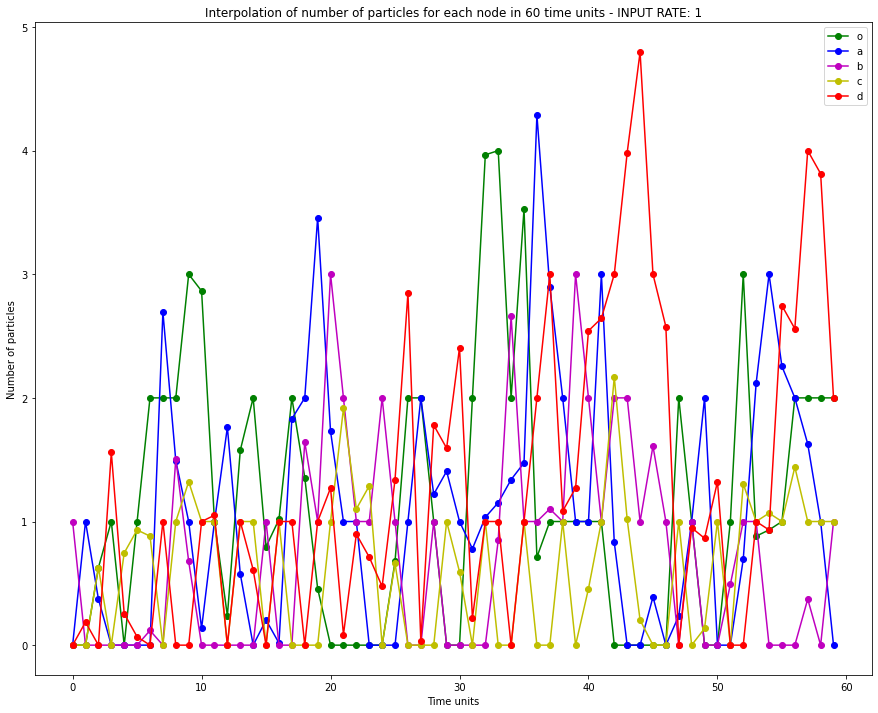

In [73]:
show_simulation(num_particles_for_node,nodes)

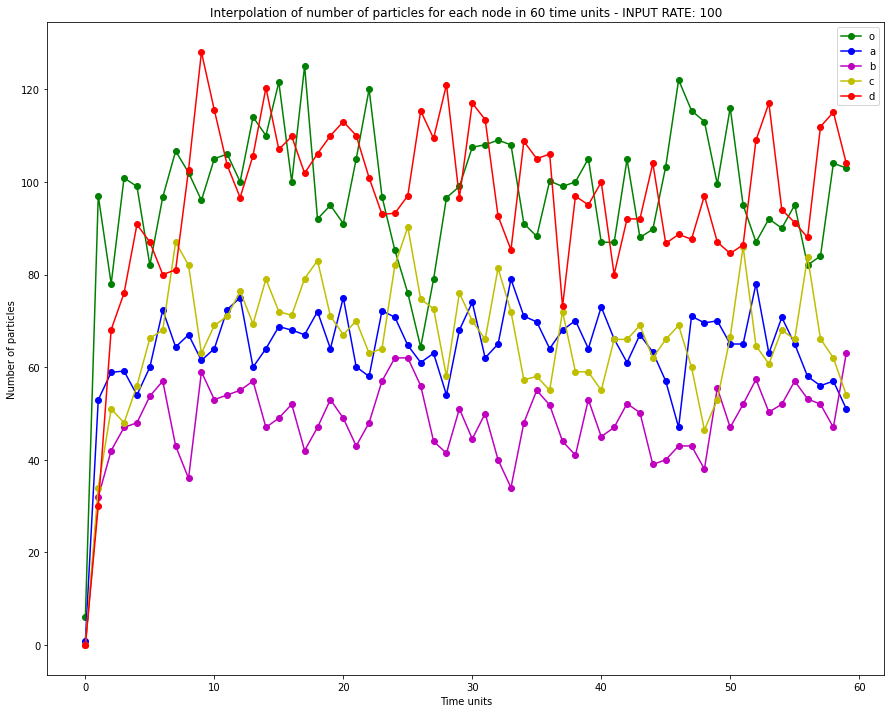

In [48]:
show_simulation(num_particles_for_node,nodes)

**Fixed rate**
(b - *first point*) Simulate the system for 60 time units and plot the evolution of number of particles in
each node over time.

In [77]:
P_cum = np.cumsum(P, axis = 1)
source_pos = nodes.index("o")
source_rate = round(1,3)
dest_pos = nodes.index("d")
time_limit = 60

num_particles=0
w_star_subgraph = 1

previous_step=-1 #Index corresponding to the number of particles of each node for the previous step
n_nodes = len(nodes)
num_particles_for_node = np.zeros((1,n_nodes))

time = 0
start = False
while time < time_limit:
    
    global_tick = -np.log(np.random.rand())/(w_star_subgraph) if start else float('+inf')
    source_tick = -np.log(np.random.rand())/source_rate
    start = True
    
    if source_tick < global_tick:
        time +=source_tick
        next_state = num_particles_for_node[previous_step]
        next_state[source_pos]+=1
        num_particles +=1
    else:
        if num_particles > 0:
            time+=global_tick
            current_state = num_particles_for_node[previous_step]
            normalized_numparticles_fornode = np.cumsum(current_state/num_particles)
            selected_node = np.argwhere(normalized_numparticles_fornode > np.random.rand())[0][0]

            next_state = num_particles_for_node[previous_step]
            if selected_node == dest_pos:
                num_particles -=1
            else:
                next_hop = np.argwhere(P_cum[selected_node] > np.random.rand())[0][0]
                next_state[next_hop]+=1

            next_state[selected_node]-=1
            num_particles_for_node = np.vstack([num_particles_for_node, next_state])

print(f"SOURCE RATE={source_rate}")
print(f"Average number of particles at the end of the simulation:{round_vector(num_particles_for_node.mean(0))}")

SOURCE RATE=1
Average number of particles at the end of the simulation:[14.063  5.127  3.27   1.603  2.095]


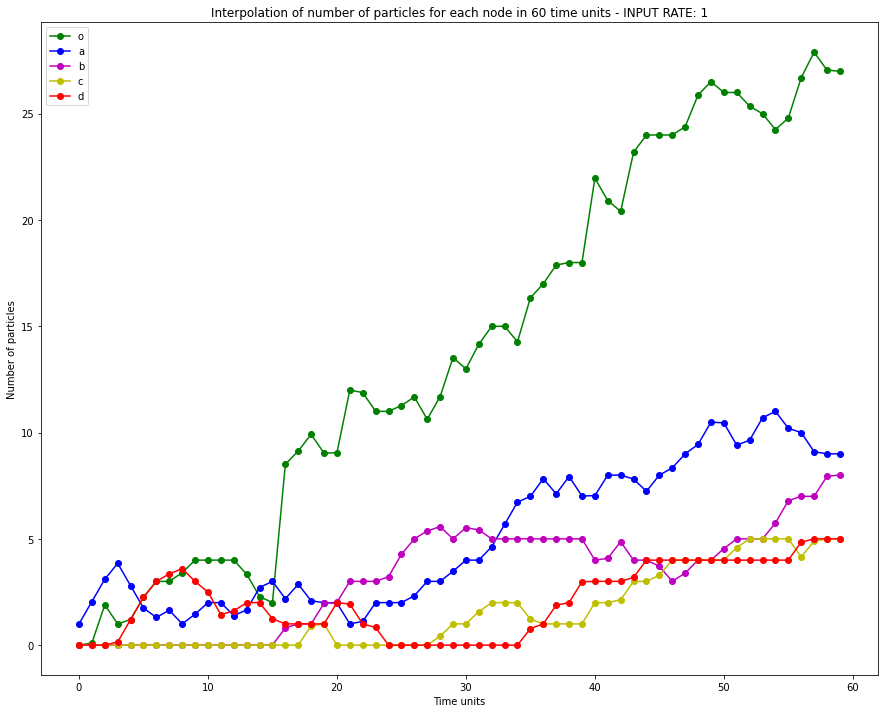

In [78]:
show_simulation(num_particles_for_node,nodes)

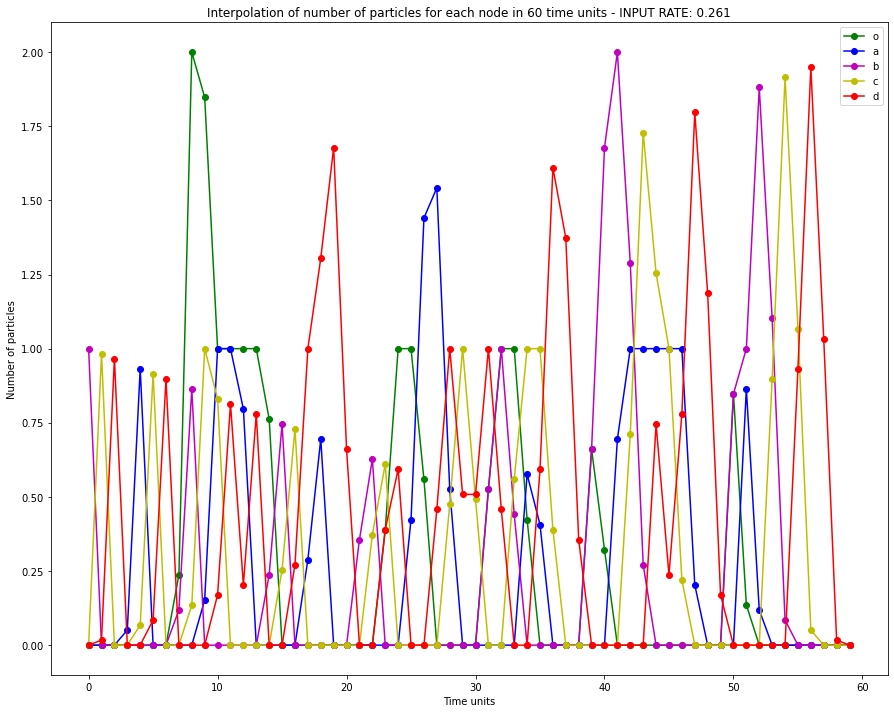

In [71]:
show_simulation(num_particles_for_node,nodes)